## Option 수익률 계산

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import FinanceDataReader as fdr
import seaborn as sns
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import matplotlib.font_manager as fm
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams["figure.figsize"] = (8,4)
mpl.rcParams['axes.grid'] = True 
path = 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# plt.title('한글제목')
# plt.show()

NanumGothic


In [3]:
def myplot(df, nrows=5,  kind='line', title='제목', labels=False):  
    if nrows > 0:
        print(df.head(nrows))
    else:
        print(df.tail(nrows))
    
    if labels:
        cols = df.columns
        for i, col in enumerate(cols):
            df[col].plot(label=labels[i], kind=kind)
    else :
        df.plot(kind=kind)
    
    plt.title(title)
    plt.legend()
    plt.show()

In [4]:
def myplotmix(df1, df2, y1='ylabel-1', y2='ylabel-2', kind1='bar', kind2='line', title='제목',  nrows1=5, nrows2=5,  labels=False):  
    ytl=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    if nrows1 > 0:
        print(df1.head(nrows1))
    elif nrows1 < 0:
        print(df1.tail(nrows1))
    if nrows2 > 0:
        print(df2.head(nrows2))
    else:
        print(df2.tail(nrows2))
    fig, ax1 = plt.subplots(figsize=(8, 4))
    ax2=ax1.twinx()
    if kind1 == 'line':
        df1.plot(kind=kind1, ax=ax2, marker='d',color='#e35f62')  #color='y', 
        df2.plot(kind=kind2, ax=ax1)  #bar
    else:
        df1.plot(kind=kind1, ax=ax1,color='#bcbd22')
        df2.plot(kind=kind2, ax=ax2) #color='y',
        
    # df['date'] = df['date'].dt.strftime('%Y-%m-%d')
    # ax1.set_xticklabels(df['date'])    
    ax1.yaxis.tick_right()
    ax2.yaxis.tick_left()
    ax1.set_ylabel(y1) #, color='red')
    ax2.set_ylabel(y2) #, color='red')
    ax1.legend(loc=1)
    ax2.legend(loc=2)
    plt.title(title)
    ax1.grid(False)
    ax2.grid(False)
    plt.show()

### 블랙숄즈 방정식

* 기초자산, 행사가, 잔존만기일, 이자율:0.025, 변동성:30%
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile9.uf.tistory.com%2Fimage%2F994347395B6E6AE6272A7F'>



In [5]:
def 잔존만기(오늘날짜, 만기일자, workday=252):
    오늘날짜 = pd.to_datetime(오늘날짜).date()
    만기일자 = pd.to_datetime(만기일자).date()
    잔존만기일 = (np.busday_count(오늘날짜, 만기일자)+1) / workday   #begindates, enddates
    print(잔존만기일 * workday)
    return 잔존만기일
잔존만기('2021-05-24', '2021-05-31', workday=252)

6.0


0.023809523809523808

In [6]:
from scipy import  stats
def 옵션이론가(기초자산, 행사가, 진존만기일, 이자율=0.02, 변동율=0.4):
    d1 = (  np.log(기초자산 / 행사가)  + (이자율 + 변동율**2 * 0.5) * 진존만기일) / (변동율 * np.sqrt(진존만기일))
    d2 = d1 -  (변동율 * np.sqrt(잔존만기일))
#     print(d1, d2)
    옵션이론가 = 기초자산 * stats.norm.cdf(d1, 0.0, 1.0)  -  행사가 * np.exp(-이자율*진존만기일) * stats.norm.cdf(d2, 0.0, 1.0)
    return 옵션이론가

In [7]:
현재일 = '2018-07-01'
만기일 = '2019-03-21'
잔존만기일 = 잔존만기(현재일, 만기일, workday=252)
print(잔존만기일)  #0.004%엑셀과 차이
현물가 = 300
행사가 = 330
option_price = 옵션이론가(현물가, 행사가, 잔존만기일)
print(option_price)  # 31.57  --> #31.45

189.0
0.75
31.5719274484114


## 행사가별 옵션가격 변화 분석

In [8]:
# 현재일 = '2018-07-01'
# 만기일 = '2019-03-21'
# 잔존만기일 = 잔존만기(현재일, 만기일, workday=252)
잔존만기일 = 0.3849

# print(잔존만기일)  #0.004%엑셀과 차이
# 현물가 = 300
행사가 = 330
# option_price = 옵션이론가(현물가, 행사가, 잔존만기일)
# print(option_price)  # 31.57  --> #31.45

In [9]:
기초자산S = np.arange(200,400, 10)  #기초자산==현물가격
# 기초자산S = np.arange(351,551, 10)  #기초자산==현물가격
행사가K = np.arange(150,350, 10)  #행사가

kdic = {}
for k in 행사가K:
    sdic = {}
    for s in 기초자산S:
        이론옵션가격 = 옵션이론가(s, k, 잔존만기일)   #기초자산, 행사가
        sdic[s] = 이론옵션가격
    kdic[k] = pd.Series(sdic)
# print(kdic)    
df = pd.DataFrame(kdic)
df.head()

,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340
200,53.588113,45.407660,37.944527,31.279125,25.449060,20.450248,16.243476,12.763850,9.930795,7.657020,5.855598,4.444918,3.351678,2.512293,1.873134,1.390007,1.027195,0.756301,0.555061,0.406231
210,62.797165,54.160104,46.124171,38.789242,32.222040,26.451979,21.472760,17.248056,13.719345,10.814176,8.453647,6.558439,5.053175,3.869199,2.946041,2.231861,1.683208,1.264341,0.946332,0.706083
220,72.252571,63.264367,54.766304,46.866253,39.649720,33.172228,27.456700,22.495272,18.254220,14.680511,11.708690,9.267166,7.283375,5.687618,4.415628,3.410016,2.620866,2.005696,1.529008,1.161601
230,81.882285,72.629989,63.768091,55.403516,47.631046,40.524016,34.128748,28.462988,23.517785,19.261768,15.646664,12.613081,10.095827,8.028347,6.346116,4.988971,3.902533,3.038884,2.356676,1.820866
240,91.633182,82.185980,73.043551,64.305736,56.068820,48.416062,41.410483,35.090812,29.470643,24.540297,20.270531,16.617225,13.526271,10.938101,8.791525,7.026718,5.587348,4.421942,3.484602,2.735233


            150         160         170         180         190         200  \
200   53.588113   45.407660   37.944527   31.279125   25.449060   20.450248   
250  101.467099   91.878339   82.523441   73.491547   64.874767   56.759575   
390  241.150980  231.229150  221.309625  211.394989  201.489780  191.601313   

            210         220         230         240         250         260  \
200   16.243476   12.763850    9.930795    7.657020    5.855598    4.444918   
250   49.219136   42.307718   36.057755   30.479502   25.562809   21.280368   
390  181.740504  171.922593  162.167616  152.500522  142.950888  133.552218   

            270         280         290        300        310        320  \
200    3.351678    2.512293    1.873134   1.390007   1.027195   0.756301   
250   17.591701   14.447329   11.792652   9.571275   7.727647   6.209001   
390  124.340888  115.354823  106.632038  98.209151  90.120007  82.394485   

           330        340  
200   0.555061   0.406231  
250  

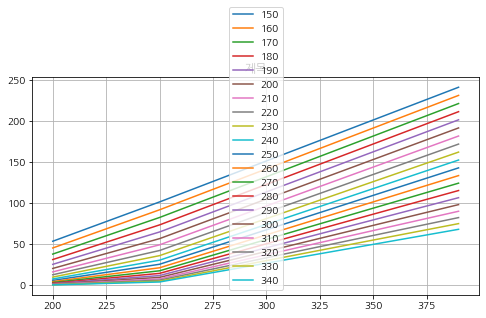

In [10]:
myplot(df.loc[[df.index.min() , df.index.min()+50, df.index.max()]])


행사가가 낮으면 낮을수록 콜옵션 가격은 올라간다
 --> 이윤을 남기려고 권리를 행사할 가능성이 커진다

### A. 델타, 감마 : 기초자산 & 행사가 - 영향도 분석
<pre><font color='red'>
* 기초자산가격의 한 단위 변동에 대한 옵션 프리미엄의 가격변화
* Delta = 옵션가격변화/기초자산의 변화 (기초자산↑ 델타↑)

<img src='https://mblogthumb-phinf.pstatic.net/20120427_193/chunjein_1335500858643DtEqp_GIF/20-1.gif?type=w2' width=400 height=300>

In [11]:
def mydelta(기초자산, 행사가, 진존만기일, 이자율=0.02, 변동율=0.4):
    d1 = (  np.log(기초자산 / 행사가)  + (이자율 + 변동율**2 * 0.5) * 진존만기일) / (변동율 * np.sqrt(진존만기일))
    delta = stats.norm.cdf(d1, 0.0,  1.0)  #N[d1]
    return delta

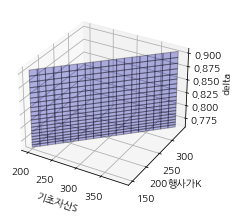

In [12]:
delta = mydelta(기초자산S, 행사가K, 잔존만기일)
# print(delta)
delta = np.array(delta).reshape(-1,1)
temp = pd.DataFrame(delta, columns=['delta'])
temp['기초자산S'] = pd.DataFrame(np.array(기초자산S).reshape(-1,1))
temp['행사가K'] = pd.DataFrame(np.array(행사가K).reshape(-1,1))



plt.figure(figsize = (5,3.5))
ax = plt.subplot(1,1,1,projection = '3d')
ax.plot_surface(기초자산S,행사가K, delta, rstride = 1,cstride = 1,alpha = 0.3,color = 'blue',edgecolor = 'black')
ax.set_xlabel('기초자산S')
ax.set_ylabel('행사가K')
ax.set_zlabel('delta')
# ax.view_init(35,65) 
plt.show()

In [13]:
temp.head()

,delta,기초자산S,행사가K
0,0.905637,200,150
1,0.894514,210,160
2,0.883773,220,170
3,0.873451,230,180
4,0.863567,240,190


0    200
1    210
2    220
3    230
4    240
Name: 기초자산S, dtype: int32
0    0.905637
1    0.894514
2    0.883773
3    0.873451
4    0.863567
Name: delta, dtype: float64


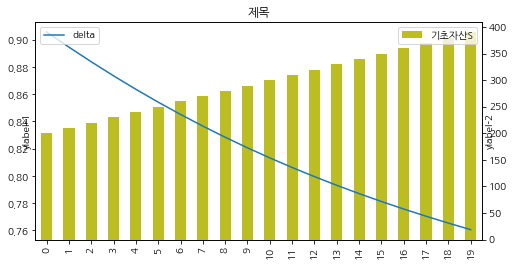

In [14]:
myplotmix(temp['기초자산S'], temp['delta'])


0    200
1    210
2    220
3    230
4    240
Name: 기초자산S, dtype: int32
0    150
1    160
2    170
3    180
4    190
Name: 행사가K, dtype: int32


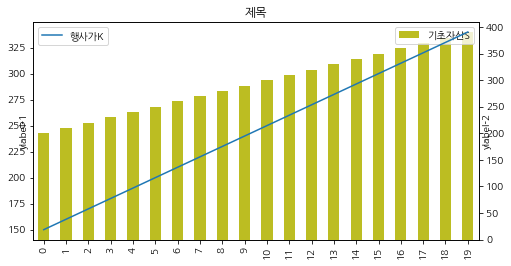

In [15]:
myplotmix(temp['기초자산S'], temp['행사가K'])